### Reading MNIST

In [1]:
import pandas as pd
import numpy as np


train = pd.read_csv("../data/mnist_train.csv")
test = pd.read_csv("../data/mnist_test.csv")

# Reestructuring
train_label, train_image = train["label"].to_numpy(), train[[x for x in train.columns if x != "label"]].to_numpy().reshape((-1, 1, 28, 28))/255
test_label, test_image = train["label"].to_numpy(), train[[x for x in train.columns if x != "label"]].to_numpy().reshape((-1, 1, 28, 28))/255

# One-hotting
one_hot = np.zeros((len(train_label), 10))
for label in range(train_label.shape[0]):
    one_hot[label, train_label[label]] = 1
train_label = one_hot

one_hot = np.zeros((len(test_label), 10))
for label in range(test_label.shape[0]):
    one_hot[label, test_label[label]] = 1
test_label = one_hot

### Creating The Model

In [8]:
import framework as fm

class Model(fm.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = fm.Conv2d(1, 6, 5, 1, bias = False)
        self.relu1 = fm.ReLu()
        self.maxpool1 = fm.MaxPool2d(2, 6, 2)

        self.conv2 = fm.Conv2d(6, 16, 5, 1, bias = False)
        self.maxpool2 = fm.MaxPool2d(2, 16, 2)
        self.bn1 = fm.BatchNorm(1)
        self.drop1 = fm.Dropout(0.4)
        self.lin1 = fm.Linear(256, 84, bias=False)
        self.bn2 = fm.BatchNorm(1)
        self.drop2 = fm.Dropout(0.2)
        self.lin2 = fm.Linear(84, 10, bias=False)


    def forward(self, x):
        x = self.conv1.forward(x) 
        x = self.relu1.forward(x) 
        x = self.maxpool1.forward(x)
        x = self.conv2.forward(x)
        x = self.maxpool2.forward(x)
        x = x.reshape((-1, 256))
        x = self.bn1.forward(x)
        x = self.drop1.forward(x)
        x = self.lin1.forward(x) 
        x = self.bn2.forward(x)
        x = self.drop2.forward(x)
        x = self.lin2.forward(x)
        return x

model = Model()
model.train()
loss_fn = fm.CrossEntropy()
optim = fm.Adam(model.get_parameters(), lr=0.001)


In [6]:
import framework as fm
import time

class Model(fm.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = fm.Conv2d(1, 32, 5, 1, bias = False)
        self.conv2 = fm.Conv2dC(32, 32, 5, 1, bias = False)
        self.bn1 = fm.BatchNorm(1)
        self.relu1 = fm.ReLu()
        self.maxpool1 = fm.MaxPool2d(2, 32, 2)
        self.dropout1 = fm.Dropout(0.25)
        self.conv3 = fm.Conv2d(32, 64, 3, bias=False)
        self.relu2 = fm.ReLu()
        self.conv4 = fm.Conv2d(64, 64, 3, bias=False)
        self.bn2 = fm.BatchNorm(1)
        self.relu3 = fm.ReLu()
        self.maxpool2 = fm.MaxPool2d(2, 64, 2)
        self.dropout2 = fm.Dropout(0.25)
        self.lin1 = fm.Linear(576, 256)
        self.bn3 = fm.BatchNorm(0)
        self.relu4 = fm.ReLu()
        self.lin2 = fm.Linear(256, 128)
        self.bn4 = fm.BatchNorm(0)
        self.relu5 = fm.ReLu()
        self.lin3 = fm.Linear(128, 84)
        self.bn5 = fm.BatchNorm(0)
        self.relu6 = fm.ReLu()
        self.dropout3 = fm.Dropout(0.25)
        self.lin4 = fm.Linear(84, 10)



    def forward(self, inpt):
        initTime = time.time()
        x = self.conv1.forward(inpt) 
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.conv2.forward(x) 
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.bn1.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.relu1.forward(x) 
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.maxpool1.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.dropout1.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.conv3.forward(x) 
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.relu2.forward(x) 
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.conv4.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.bn2.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.relu3.forward(x) 
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.maxpool2.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.dropout2.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = x.reshape((inpt.shape[0], x.shape[1] * x.shape[2] * x.shape[3]))
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.lin1.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.bn3.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.relu4.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.lin2.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.bn4.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.relu5.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.lin3.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.bn5.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.relu6.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.dropout3.forward(x)
        print("Time:", time.time()- initTime)
        initTime = time.time()
        x = self.lin4.forward(x) 
        print("Time:", time.time()- initTime)
        return x

model = Model()
model.train()
loss_fn = fm.CrossEntropy()
optim = fm.Adam(model.get_parameters(), lr=0.001)

#### Training The Model

In [10]:
def train(model, x, y, batch_size, loss_fn, optim):

    num_batches = int(len(y)/batch_size)

    total_loss = 0
    total_correct = 0

    for batch in range(num_batches):
        batch_start, batch_end = (batch * batch_size, (batch + 1) * batch_size)

        inpt = fm.Tensor(x[batch_start:batch_end])
        label = fm.Tensor(y[batch_start:batch_end])
        
        pred = model.forward(inpt)

        pred_nums = np.argmax(pred.data, axis=1)
        label_nums = np.argmax(label.data, axis=1)

        correct = (pred_nums == label_nums).sum()
        
        loss = loss_fn.forward(pred, label)

        total_loss += loss 
        total_correct += correct

        if batch % int(num_batches/10) == 0:
            print(f"loss: {loss} [{(batch+1)*batch_size}/{batch_size*num_batches}]")   
      
        loss_fn.backward()
        optim.step()

    total_loss /= num_batches
    total_correct /= num_batches * batch_size

    print("Avg error: ", total_loss)
    print("Train Precision: ", total_correct, "\n")  

    return total_loss, total_correct


In [11]:
def test(model, x, y, batch_size):
    model.test()
    correct = 0
    batch_size = 128
    num_batches = int(len(y)/batch_size)
    for batch in range(num_batches):
            batch_start, batch_end = (batch * batch_size, (batch + 1) * batch_size)

            inpt = fm.Tensor(x[batch_start:batch_end])
            label = fm.Tensor(y[batch_start:batch_end])
            
            pred = model.forward(inpt)

            pred_nums = np.argmax(pred.data, axis=1)
            label_nums = np.argmax(label.data, axis=1)

            correct += (pred_nums == label_nums).sum()

    correct /= batch_size * num_batches

    print("Test Accuracy:", correct * 100, "%\n")
    return correct

In [ ]:
import matplotlib.pyplot as plt

losses = []
train_precision = []

test_precision = []

epochs = 30

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    model.train()

    loss, precision = train(model, train_image, train_label, 128, loss_fn, optim)
    
    losses.append(loss)
    train_precision.append(precision)

    if epoch % 2 == 0:
        model.test()
        precision = test(model, test_image, test_label, 128)

        test_precision.append(precision)


Epoch 1
-------------------------------
loss: 1.2489986419677734 [128/59904]


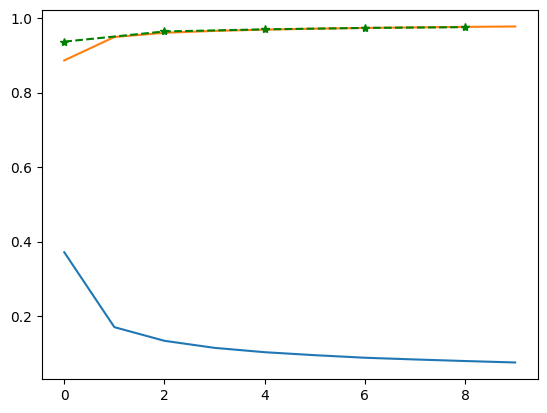

In [51]:
plt.plot(losses)
plt.plot(train_precision)
plt.plot(np.arange(0, 9, 2), test_precision, "g*--")

plt.show()

### Saving model

In [16]:
model.save("97_71precision")

Object saved successfully.


### Load Model

In [ ]:
import pickle
import framework as fm 
import numpy as np 
import pandas as np

with open('97precision.pkl', 'rb') as file:
    model = pickle.load(file)

print("Object loaded successfully.")

Object loaded successfully.


#### Test Accuracy

In [29]:
# Testing
model.test()
correct = 0
batch_size = 128
num_batches = int(len(train_label)/batch_size)
for batch in range(num_batches):
        batch_start, batch_end = (batch * batch_size, (batch + 1) * batch_size)

        inpt = fm.Tensor(test_image[batch_start:batch_end])
        label = fm.Tensor(test_label[batch_start:batch_end])
        
        pred = model.forward(inpt)

        pred_nums = np.argmax(pred.data, axis=1)
        label_nums = np.argmax(label.data, axis=1)

        correct += (pred_nums == label_nums).sum()

print("Accuracy:", correct / (batch_size * num_batches) * 100, "%")

Accuracy: 97.48597756410257 %


#### Creation of API

In [7]:
import uvicorn
from fastapi import Request, FastAPI
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

@app.post("/predict")
async def predict(request: Request):
    res = await request.json()
    picture = fm.Tensor(np.array(res).reshape((1, 1, 28, 28)))
    pred = model.forward(picture)
    num = int(np.argmax(pred.data, axis=1))

    return num

if __name__ == "__main__":
    
    nest_asyncio.apply()  # Allow asyncio.run to work in a running loop
    uvicorn.run(app, host="127.0.0.1", port=3838)

INFO:     Started server process [5888]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:3838 (Press CTRL+C to quit)


INFO:     127.0.0.1:41430 - "OPTIONS /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK


/tmp/ipykernel_5888/1124103067.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = int(np.argmax(pred.data, axis=1))


INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:41436 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:57716 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:57716 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:57716 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:57716 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:57716 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:57716 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:57716 - "POST /predi

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [5888]


In [27]:
import numpy as np
import framework as fm

np.random.seed(0)
data = fm.Tensor(np.random.random((1, 10)))
drop = fm.Dropout(0.2)
drop.training = True

res = drop.forward(data)

loss = fm.Tensor(np.ones((data.data.shape)))

print("Data: ", data)

print(drop.mask)

print("Res: ", res)

res.backward(loss)

print("Data Loss: ", data.gradient)

Data:  [[0.5488135  0.71518934 0.60276335 0.5448832  0.4236548  0.6458941
  0.4375872  0.891773   0.96366274 0.3834415 ]]
[[0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]]
Res:  [[0.        0.        0.        0.5448832 0.        0.        0.
  0.891773  0.        0.3834415]]
Data Loss:  [[0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]]


In [1]:
%%time

import numpy as np
import framework as fm

np.random.seed(0)

conv = fm.Conv2dC(1, 6, 5, 1, bias = False)
x = np.random.random((30000, 1, 28, 28))
res = conv.forward(fm.Tensor(x))

CPU times: user 2.45 s, sys: 12.9 s, total: 15.4 s
Wall time: 14.8 s
